# Полиномиальная регрессия, предсказание посещений сайта

In [1]:
import scipy
import pandas
import numpy
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

# грузим данные
trainSet = pandas.read_csv('data/web_traffic.tsv', sep='\t', header = None).dropna()

print(trainSet.shape)
print(pandas.DataFrame(trainSet).head(10))

(735, 2)
     0       1
0    1  2272.0
2    3  1386.0
3    4  1365.0
4    5  1488.0
5    6  1337.0
6    7  1883.0
7    8  2283.0
8    9  1335.0
9   10  1025.0
10  11  1139.0


Генерация датафреймов

In [2]:
x_data = trainSet.iloc[:,0] 
y_data = trainSet.iloc[:,1]

Визуализация

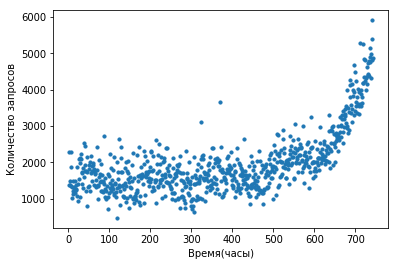

In [3]:
plot.scatter(x_data, y_data, s = 10)
plot.xlabel('Время(часы)')
plot.ylabel('Количество запросов')
plot.show()

Создаем полиномы, разных степеней

In [4]:
theta11, theta01 = numpy.polyfit(x_data, y_data, 1)
theta22, theta12, theta02 = numpy.polyfit(x_data, y_data, 2)
theta33, theta32, theta13, theta03 = numpy.polyfit(x_data, y_data, 3)
theta44, theta34, theta24, theta14, theta04 = numpy.polyfit(x_data, y_data, 4)
theta55, theta45, theta35, theta25, theta15, theta05 = numpy.polyfit(x_data, y_data, 5)

poly1 = lambda x: theta11 * x + theta01
poly2 = lambda x: theta22 * x**2 + theta12 * x + theta02
poly3 = lambda x: theta33 * x**3 + theta32 * x**2 + theta13 * x + theta03
poly4 = lambda x: theta44 * x**4 + theta34 * x**3 + theta24 * x**2 + theta14 * x + theta04
poly5 = lambda x: theta55 * x**5 + theta45 * x**4 + theta35 * x**3 + theta25 * x**2 + theta15 * x + theta05

print("Полином 1-ой степени: " + str(round(theta11, 4)) + " * x + " + str(round(theta01, 4)))
print("Полином 5-ой степени: " + str(round(theta55, 4)) + " * x^5 + " + str(round(theta45, 4)) + " * x^4 + " + str(round(theta35, 4)) + " * x^3 + " + str(round(theta25, 4)) + " * x^2 + " + str(round(theta15, 4)) + " * x + " + str(round(theta05, 4)))

Полином 1-ой степени: 2.5962 * x + 989.0249
Полином 5-ой степени: 0.0 * x^5 + -0.0 * x^4 + 0.0002 * x^3 + -0.0341 * x^2 + 2.2479 * x + 1536.1605


Вычисляем СКО

In [5]:
def calc_error(x_list, y_list, func):
    error = []
    for i in range(len(y_list.values)):
        error.append((func(x_list.values[i]) - y_list.values[i])**2)
    return sum(error)

error1 = calc_error(x_data, y_data, poly1)
error2 = calc_error(x_data, y_data, poly2)
error3 = calc_error(x_data, y_data, poly3)
error4 = calc_error(x_data, y_data, poly4)
error5 = calc_error(x_data, y_data, poly5)

print("^1 CKO = " + str(error1))
print("^2 CKO = " + str(error2) + " + " + str(100 - 100 * error2 / error1) + "% к точности")
print("^3 CKO = " + str(error3) + " + " + str(100 - 100 * error3 / error1) + "% к точности")
print("^4 CKO = " + str(error4) + " + " + str(100 - 100 * error4 / error1) + "% к точности")
print("^5 CKO = " + str(error5) + " + " + str(100 - 100 * error5 / error1) + "% к точности")

^1 CKO = 317389767.33977795
^2 CKO = 179983507.87817925 + 43.292592767964074% к точности
^3 CKO = 139350144.0317254 + 56.094947483752456% к точности
^4 CKO = 126972023.67851375 + 59.994922097603315% к точности
^5 CKO = 124464714.56616355 + 60.78490002706379% к точности


Предсказываем:

In [6]:
model = LinearRegression()
tx = x_data.values.reshape(-1, 1)
ty = y_data.values.reshape(-1, 1)
model.fit(tx, ty)
x_test = numpy.array(list(range(744, 751)))
y_test = model.predict(numpy.array(list(range(744, 751))).reshape(-1, 1)).flatten()
t01, t11 = scipy.polyfit(x_test, y_test, 1)
t02, t12, t22, t32, t42, t52 = scipy.polyfit(x_test, y_test, 5)
print("Предсказание значения целевого параметра для x = list(range(744, 751))")
print("Полином 1-ой степени: " + str(round(t11, 4)) + " * x + " + str(round(t01, 4)))
print("Полином 5-ой степени: " + str(round(t52, 4)) + " * x^5 + " + str(round(t42, 4)) + " * x^4 + " + str(round(t32, 4)) + " * x^3 + " + str(round(t22, 4)) + " * x^2 + " + str(round(t12, 4)) + " * x + " + str(round(t02, 4)))

Предсказание значения целевого параметра для x = list(range(744, 751))
Полином 1-ой степени: 989.0249 * x + 2.5962
Полином 5-ой степени: 1023.5737 * x^5 + 2.3649 * x^4 + 0.0006 * x^3 + -0.0 * x^2 + 0.0 * x + -0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


Визуализация

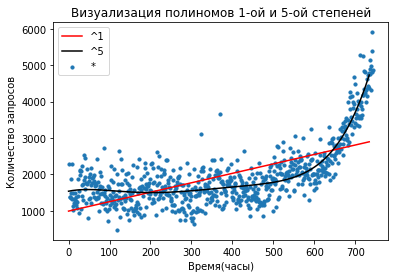

In [7]:
x = [1, len(y_data)]
x_range = list(range(len(y_data)))

f1 = scipy.poly1d(numpy.polyfit(x_data, y_data, 1))
f5 = scipy.poly1d(numpy.polyfit(x_data, y_data, 5))

plot.title('Визуализация полиномов 1-ой и 5-ой степеней')
plot.scatter(x_data, y_data, s = 10, label = '*')
plot.plot(x_range, f1(x_range), label = '^1', c = 'red')
plot.plot(x_range, f5(x_range), label='^5', c = 'black')
plot.xlabel('Время(часы)')
plot.ylabel('Количество запросов')
plot.legend()
plot.show()